In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
warnings.filterwarnings("ignore")

# **Connected to drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Heart.csv", header=None)

In [5]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (1026, 1)


In [6]:
df.head()

,0
0,"age,sex,cp,trestbps,chol,fbs,restecg,thalach,e..."
1,"52,1,0,125,212,0,1,168,0,1,2,2,3,0"
2,"53,1,0,140,203,1,0,155,1,3.1,0,0,3,0"
3,"70,1,0,145,174,0,1,125,1,2.6,0,0,3,0"
4,"61,1,0,148,203,0,1,161,0,0,2,1,3,0"


In [7]:
df_split = df[0].str.split(",", expand=True)


df_split.columns = df_split.iloc[0]
df_split = df_split[1:]


df_split = df_split.reset_index(drop=True)
df_split = df_split.apply(pd.to_numeric, errors='ignore')

print(df_split.head())

0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

0  ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
print(df_split.shape)
df_split.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})




(1025, 14)


0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.000000,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.400000,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.800000,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.800000,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.200000,1,2,2,0


In [9]:
dict = {}
for i in list(df_split.columns):
    dict[i] = df_split[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


# **Seperate the column in category and continuous**

In [10]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thal']
The continuous cols are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is :   ['output']


In [11]:
df_split[con_cols].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [12]:
df_split.isnull().sum()

,0
0,
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


# ***Exploaratory Data Analysis***

# 1.   Univariate Analysis





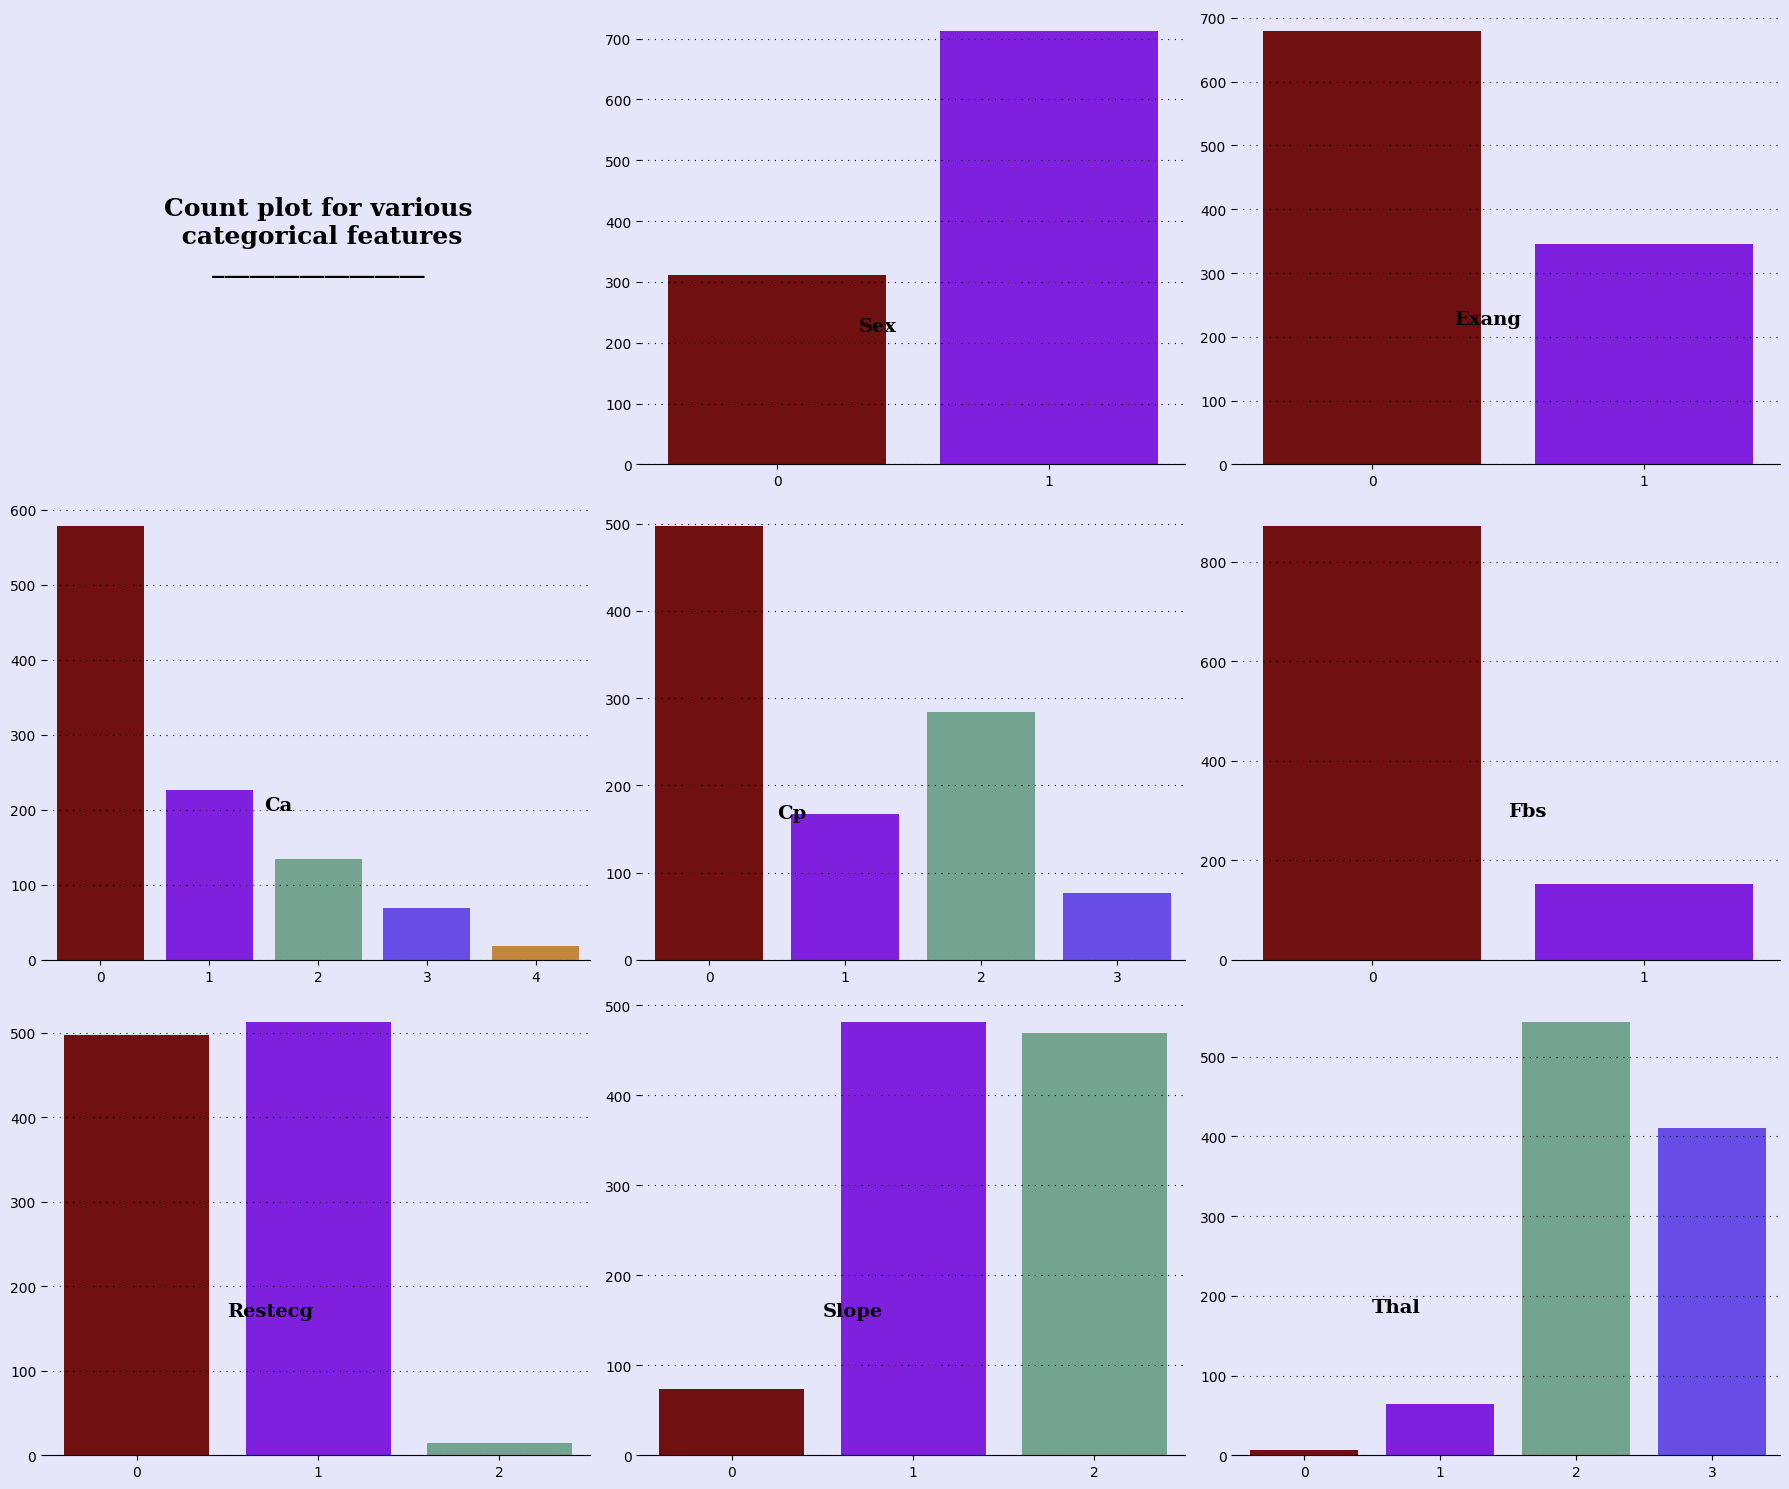

In [38]:
background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Features to plot
features = ["sex", "exang", "ca", "cp", "fbs", "restecg", "slope", "thal"]
titles = ["Sex", "Exang", "Ca", "Cp", "Fbs", "Restecg", "Slope", "Thal"]
y_positions = [220, 220, 200, 162, 290, 165, 155, 180]  # matching your original

# Create figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.patch.set_facecolor(background_color)
axes = axes.flatten()

# Title in the first subplot
axes[0].axis("off")
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             ha='center', va='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif', color="#000000")

# Generate plots for each feature
for i, (col, title, ypos) in enumerate(zip(features, titles, y_positions), start=1):
    ax = axes[i]
    ax.set_facecolor(background_color)
    sns.countplot(data=df_split, x=col, ax=ax, palette=color_palette)
    ax.text(0.3 if col in ["sex","exang"] else 1.5 if col=="ca" else 0.5,
            ypos, title, fontsize=14, fontweight='bold',
            fontfamily='serif', color="#000000")
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xlabel("")
    ax.set_ylabel("")
    # remove extra spines
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

# **Box Plot**

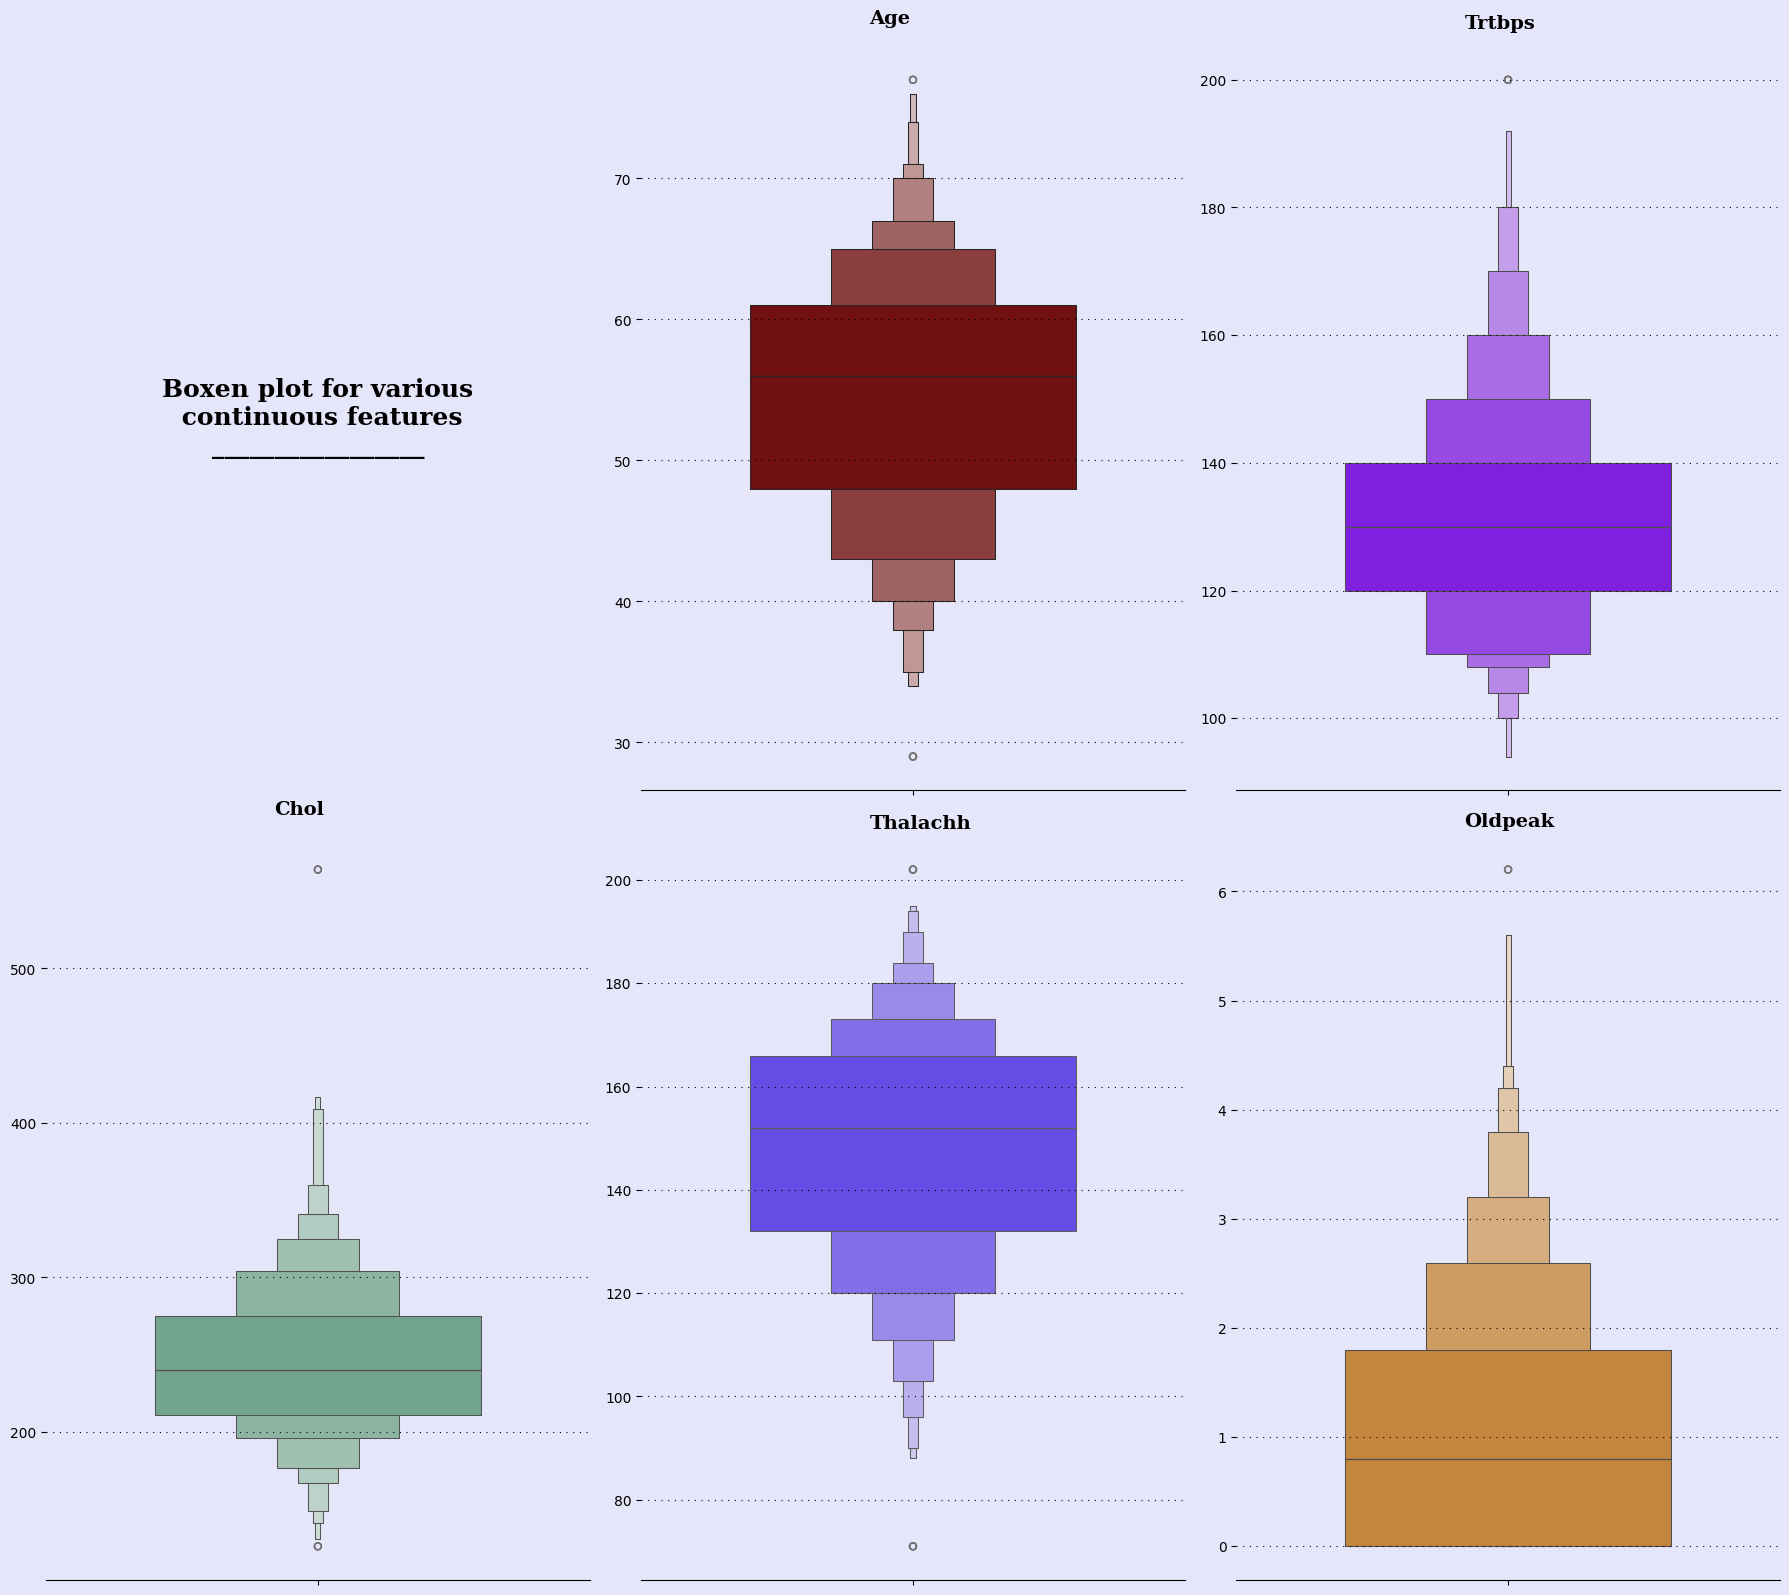

In [39]:
background_color = "#E6E6FA"
colors = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]

# Continuous features and labels
features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
labels = ["Age", "Trtbps", "Chol", "Thalachh", "Oldpeak"]
y_positions = [81, 208, 600, 210, 6.6]  # match your chosen placements

# Create subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 16))
fig.patch.set_facecolor(background_color)
axes = axes.flatten()

# Title subplot
axes[0].axis("off")
axes[0].text(0.5, 0.5,
             'Boxen plot for various\n continuous features\n_________________',
             ha='center', va='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif', color="#000000")

# Loop for plotting each feature
for i, (col, label, ypos, color) in enumerate(zip(features, labels, y_positions, colors), start=1):
    ax = axes[i]
    ax.set_facecolor(background_color)
    sns.boxenplot(y=df_split[col], ax=ax, palette=[color], width=0.6)
    ax.text(-0.08, ypos, label,
            fontsize=14, fontweight='bold',
            fontfamily='serif', color="#000000")
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xlabel("")
    ax.set_ylabel("")
    # Hide extra spines
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

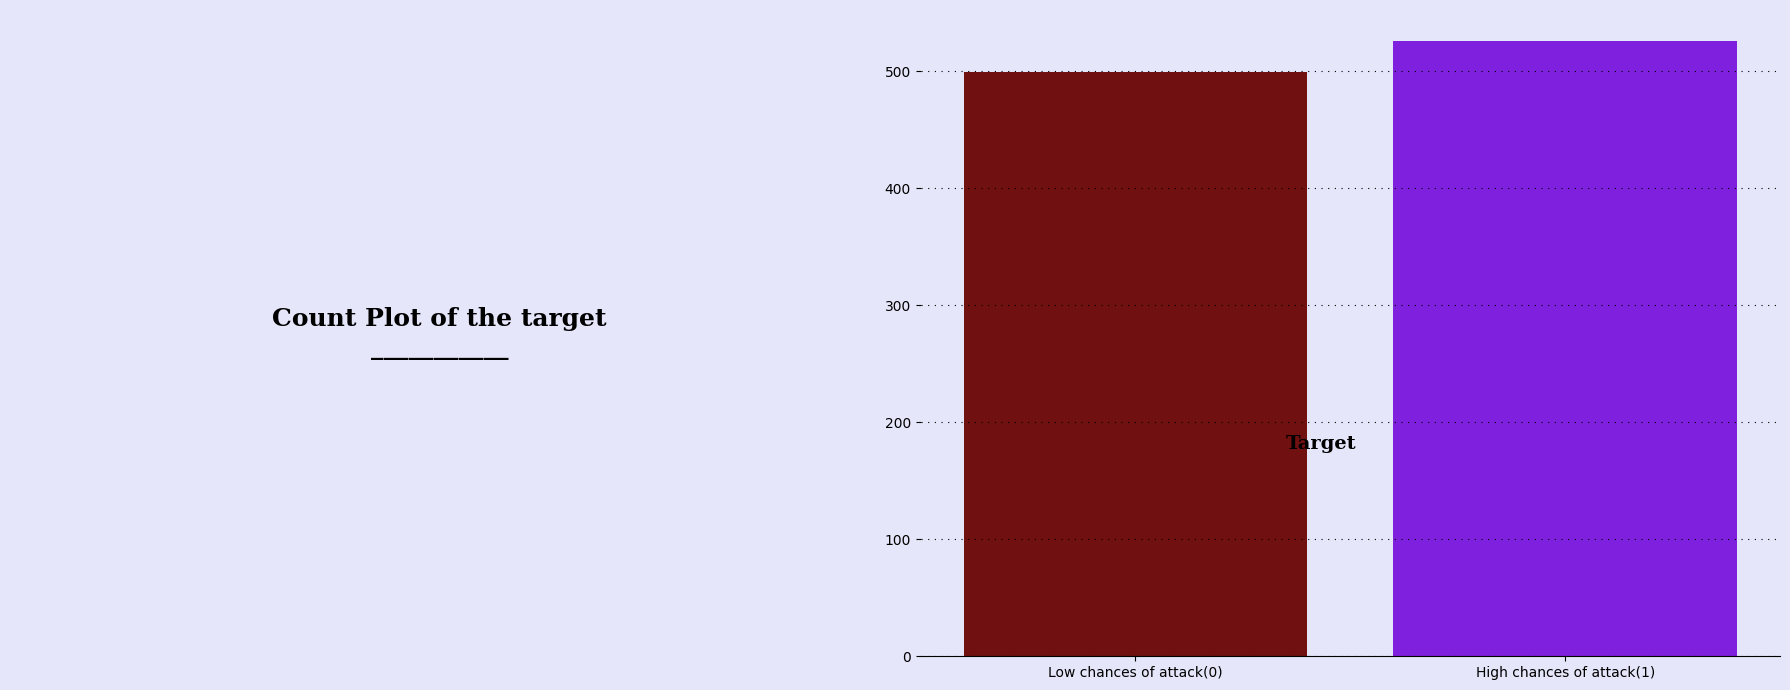

In [40]:
background_color = "#E6E6FA"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Create subplot grid
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.patch.set_facecolor(background_color)
axes = axes.flatten()

# Title subplot
axes[0].set_facecolor(background_color)
axes[0].axis("off")
axes[0].text(0.5, 0.5,
             "Count Plot of the target\n___________",
             ha='center', va='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif', color='#000000')

# Target count plot
ax1 = axes[1]
ax1.set_facecolor(background_color)
sns.countplot(ax=ax1, data=df_split, x='target', palette=color_palette)
ax1.text(0.35, 177, "Target",
         fontsize=14, fontweight='bold',
         fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)", "High chances of attack(1)"])

# Hide unnecessary spines
for spine in ["top", "left", "right"]:
    ax1.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# **Correlation Matrix of continuous features**




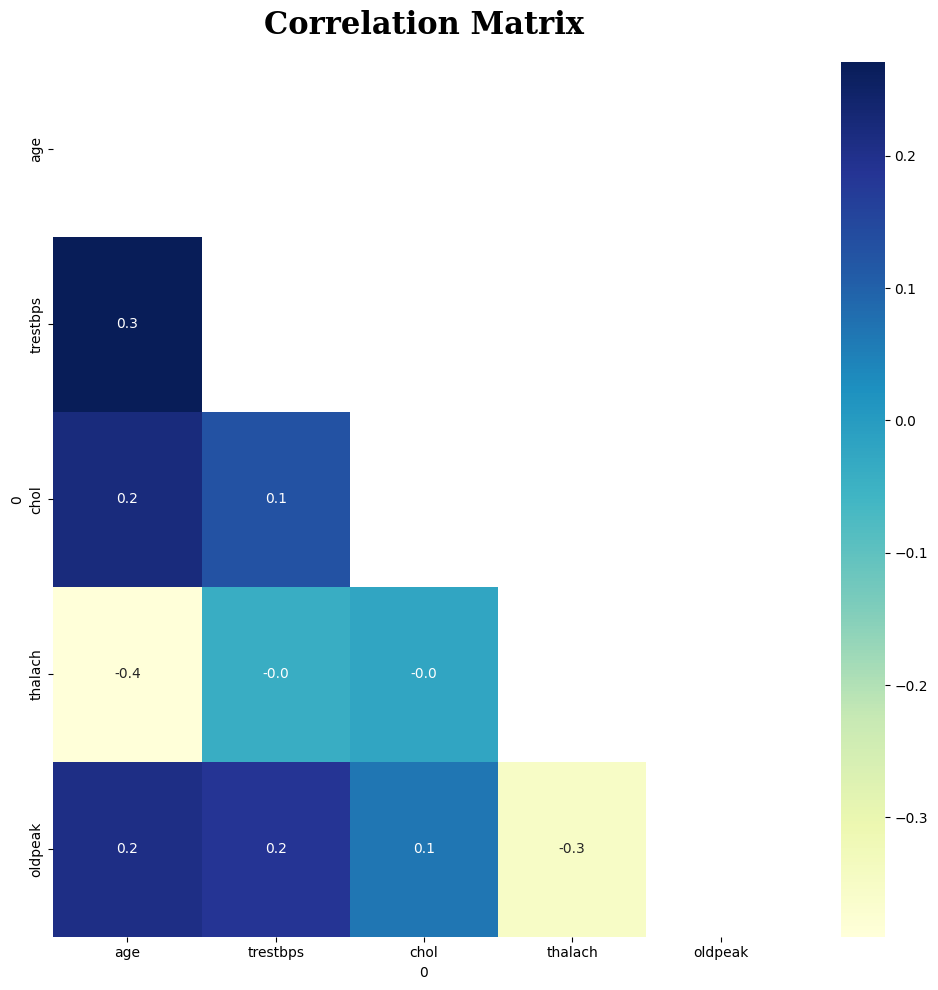

In [41]:
df_corr = df_split[con_cols].corr()

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Upper triangle mask
mask = np.triu(np.ones_like(df_corr))

# Heatmap
sns.heatmap(df_corr, mask=mask, fmt=".1f", annot=True, cmap="YlGnBu", ax=ax)

# Title
ax.set_title("Correlation Matrix", fontsize=22, fontweight='bold',
             fontfamily='serif', color="#000000", pad=20)

plt.tight_layout()
plt.show()



# **Distribution of continuous features according to target variable**

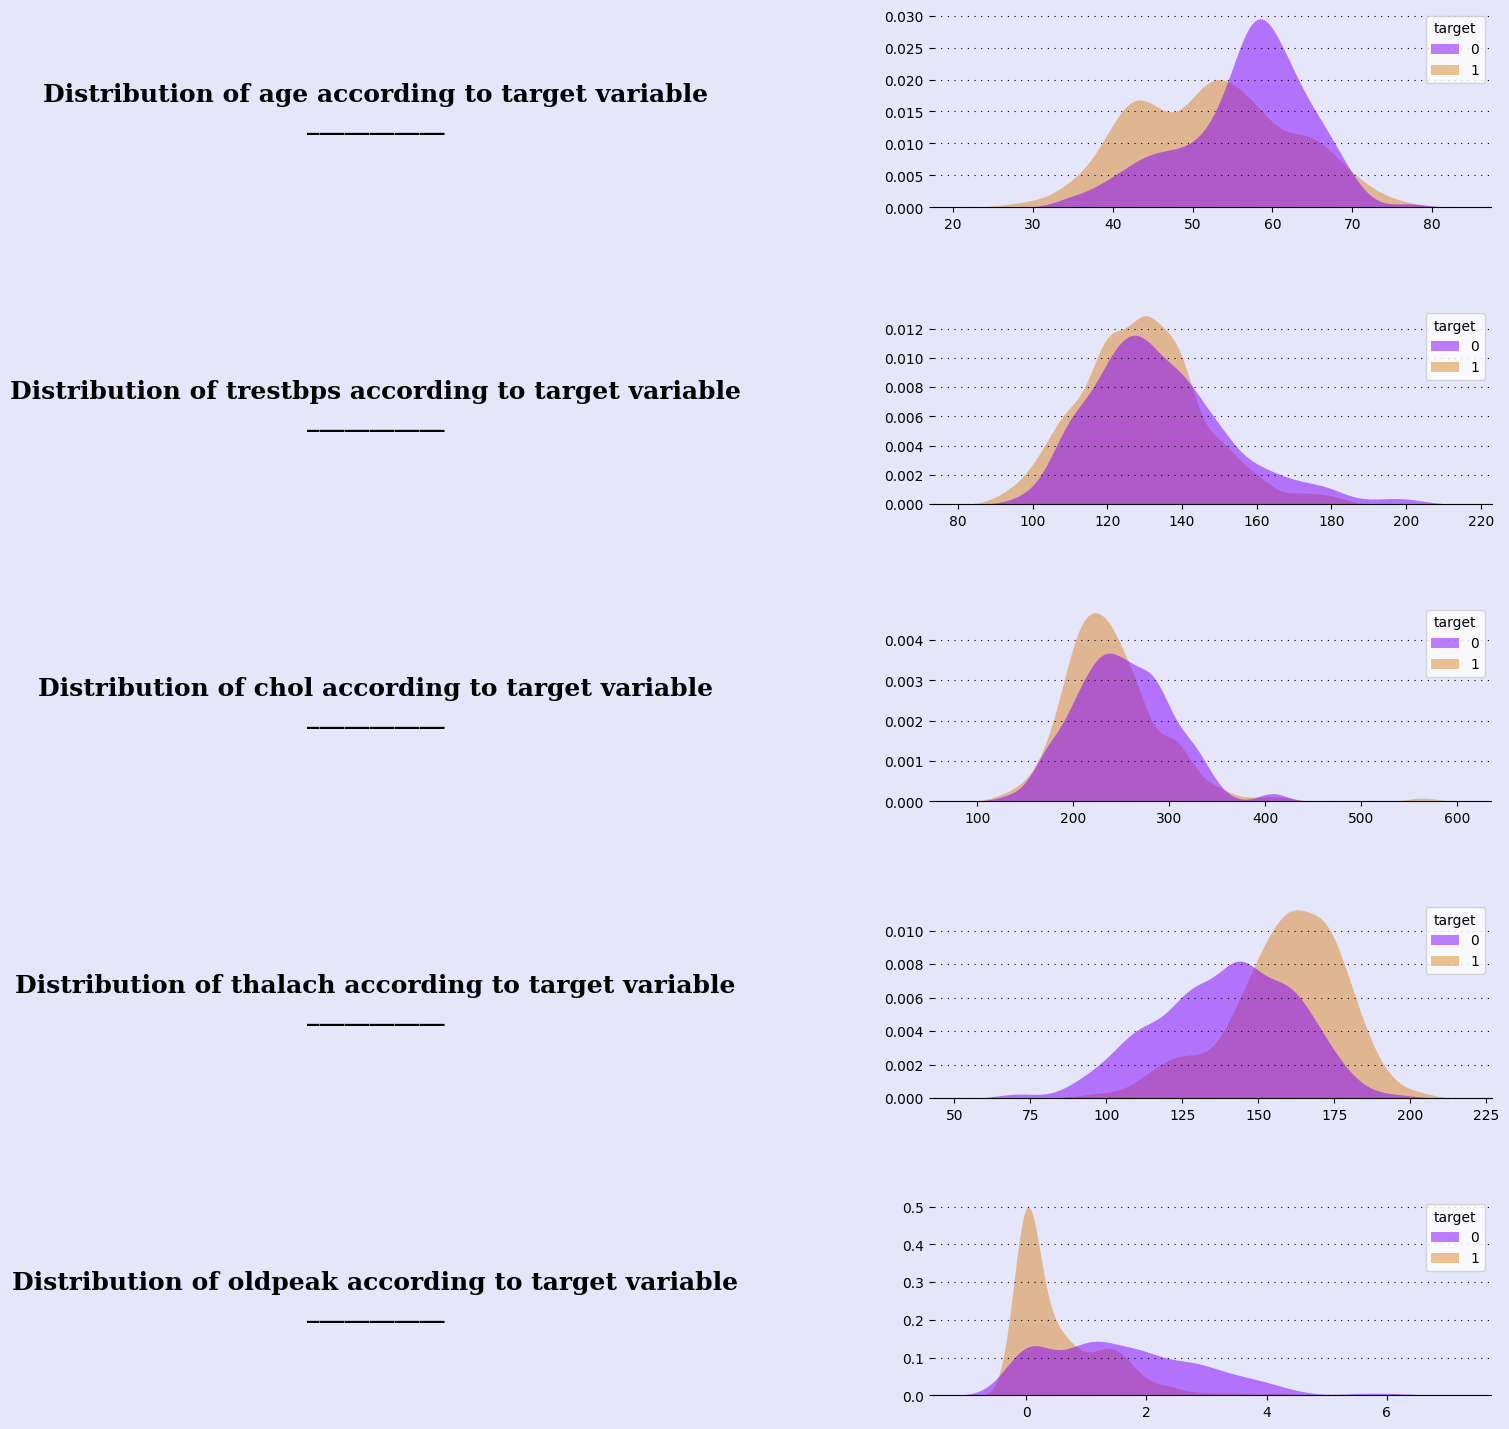

In [42]:
# Features to plot
features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
titles = [
    "Distribution of age according to target variable",
    "Distribution of trestbps according to target variable",
    "Distribution of chol according to target variable",
    "Distribution of thalach according to target variable",
    "Distribution of oldpeak according to target variable"
]

# Setup figure
fig = plt.figure(figsize=(18, 18))
gs = fig.add_gridspec(5, 2, wspace=0.5, hspace=0.5)
background_color = "#E6E6FA"
fig.patch.set_facecolor(background_color)

# Palette
palette = ["#8000ff", "#da8829"]

# Loop through features
for idx, feature in enumerate(features):
    # Title subplot
    ax_title = fig.add_subplot(gs[idx, 0])
    ax_title.set_facecolor(background_color)
    ax_title.text(0.5, 0.5, f"{titles[idx]}\n___________",
                  ha="center", va="center",
                  fontsize=18, fontweight="bold",
                  fontfamily="serif", color="#000000")
    ax_title.set_xticks([])
    ax_title.set_yticks([])
    ax_title.spines[:].set_visible(False)

    # KDE plot subplot
    ax_plot = fig.add_subplot(gs[idx, 1])
    ax_plot.set_facecolor(background_color)
    ax_plot.grid(color="#000000", linestyle=":", axis="y", zorder=0, dashes=(1,5))
    sns.kdeplot(ax=ax_plot, data=df_split, x=feature,
                hue="target", fill=True, palette=palette,
                alpha=0.5, linewidth=0)
    ax_plot.set_xlabel("")
    ax_plot.set_ylabel("")
    for side in ["top", "left", "right"]:
        ax_plot.spines[side].set_visible(False)

# Save
plt.savefig("continuous_features_distribution.pdf", dpi=300,
            bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

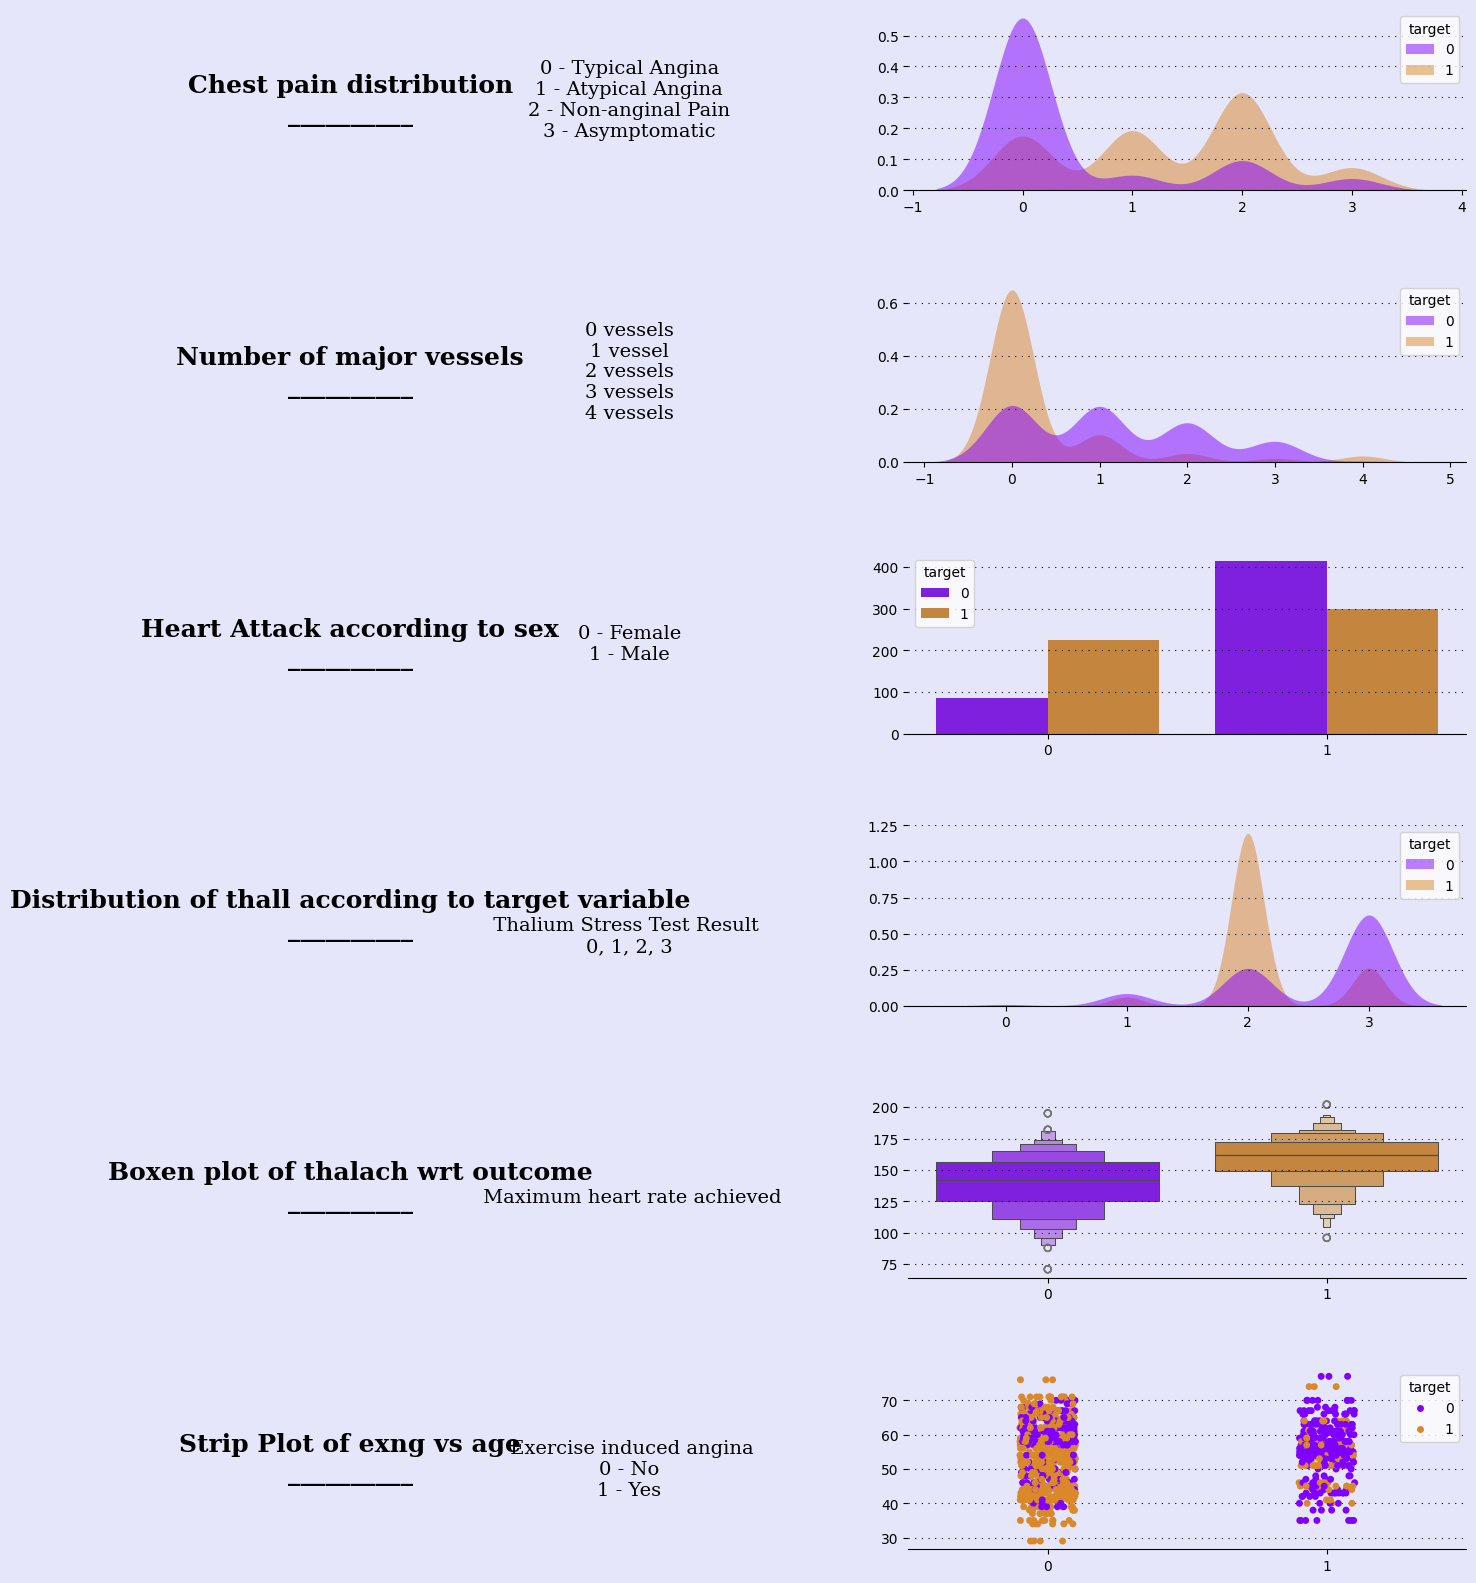

In [50]:
background_color = "#E6E6FA"
palette = ["#8000ff", "#da8829"]

# Define figure and grid
fig, axes = plt.subplots(6, 2, figsize=(18, 20))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.patch.set_facecolor(background_color)

# Configuration for each pair of plots
plot_configs = [
    ("Chest pain distribution", "0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic", "cp", "kde"),
    ("Number of major vessels", "0 vessels\n1 vessel\n2 vessels\n3 vessels\n4 vessels", "ca", "kde"),
    ("Heart Attack according to sex", "0 - Female\n1 - Male", "sex", "count"),
    ("Distribution of thall according to target variable", " \n \n Thalium Stress Test Result  \n0, 1, 2, 3", "thal", "kde"),
    ("Boxen plot of thalach wrt outcome", "\n Maximum heart rate achieved", "thalach", "boxen"),
    ("Strip Plot of exng vs age", "\n Exercise induced angina\n0 - No\n1 - Yes", "exang", "strip"),
]

# Helper function for title subplots
def add_title(ax, title, explanation):
    ax.set_facecolor(background_color)
    ax.text(0.5, 0.5, f"{title}\n__________",
            ha="center", va="center",
            fontsize=18, fontweight="bold",
            fontfamily="serif", color="#000000")
    ax.text(1, 0.5, explanation,
            ha="center", va="center",
            fontsize=14, fontfamily="serif")
    ax.set_xticks([]); ax.set_yticks([])
    for side in ax.spines:
        ax.spines[side].set_visible(False)

# Helper function for plots
def add_plot(ax, feature, plot_type):
    ax.set_facecolor(background_color)
    ax.grid(color="#000000", linestyle=":", axis="y", zorder=0, dashes=(1, 5))

    if plot_type == "kde":
        sns.kdeplot(data=df_split, x=feature, hue="target",
                    fill=True, palette=palette, alpha=0.5, linewidth=0, ax=ax)
    elif plot_type == "count":
        sns.countplot(data=df_split, x=feature, hue="target",
                      palette=palette, ax=ax)
    elif plot_type == "boxen":
        sns.boxenplot(data=df_split, x="target", y=feature,
                      palette=palette, ax=ax)
    elif plot_type == "strip":
        sns.stripplot(data=df_split, x=feature, y="age", hue="target",
                      palette=palette, ax=ax)

    ax.set_xlabel(""); ax.set_ylabel("")
    for side in ["top", "left", "right"]:
        ax.spines[side].set_visible(False)

# Build all subplots
for (title, explanation, feature, plot_type), (ax_title, ax_plot) in zip(plot_configs, axes):
    add_title(ax_title, title, explanation)
    add_plot(ax_plot, feature, plot_type)

plt.show()

# **Scaling and Encoding features**

In [20]:

df1 = df_split.copy()


cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]

df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)


X = df1.drop(['target'],axis=1)
y = df1[['target']]

# instantiating the scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trestbps,chol,thalach,oldpeak,sex_1,exang_1,ca_1,ca_2,ca_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,-0.307692,-0.25,-0.437500,0.470588,0.111111,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,-0.230769,0.50,-0.578125,0.088235,1.277778,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1.076923,0.75,-1.031250,-0.794118,1.000000,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.384615,0.90,-0.578125,0.264706,-0.444444,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,0.461538,0.40,0.843750,-1.352941,0.611111,False,False,False,False,True,...,False,False,True,True,False,True,False,False,True,False


# **Test and Train**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.7, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (307, 22)
The shape of X_test is        (718, 22)
The shape of y_train is       (307, 1)
The shape of y_test is        (718, 1)


In [22]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The data (X_train, X_test, y_train, y_test) has already been preprocessed
# and is ready for model training.
# The following preprocessing steps are redundant and causing the error.
# Removing them:

# define preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), con_cols),
#         ('cat', OneHotEncoder(), cat_cols)])

# fit and transform training data
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

## Model Training

# CatBoost Model

0:	test: 0.7707143	best: 0.7707143 (0)	total: 7.38ms	remaining: 5.9s
100:	test: 0.9954286	best: 0.9954286 (99)	total: 765ms	remaining: 5.29s
200:	test: 0.9996190	best: 0.9996190 (168)	total: 1.65s	remaining: 4.92s
300:	test: 1.0000000	best: 1.0000000 (213)	total: 3.4s	remaining: 5.64s
400:	test: 1.0000000	best: 1.0000000 (213)	total: 4.97s	remaining: 4.94s
500:	test: 1.0000000	best: 1.0000000 (213)	total: 5.93s	remaining: 3.54s
600:	test: 1.0000000	best: 1.0000000 (213)	total: 6.83s	remaining: 2.26s
700:	test: 1.0000000	best: 1.0000000 (213)	total: 7.28s	remaining: 1.03s
799:	test: 1.0000000	best: 1.0000000 (213)	total: 7.7s	remaining: 0us

bestTest = 1
bestIteration = 213

Shrink model to first 214 iterations.

--- CatBoost Performance ---
Training Accuracy: 0.9988
Testing Accuracy : 0.9902
AUC Score        : 1.0000

Confusion Matrix:
 [[100   0]
 [  2 103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     

<Figure size 600x500 with 0 Axes>

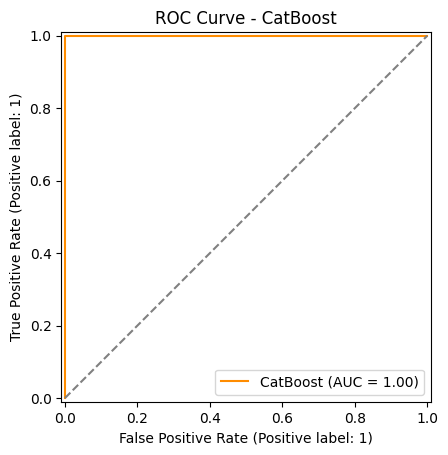

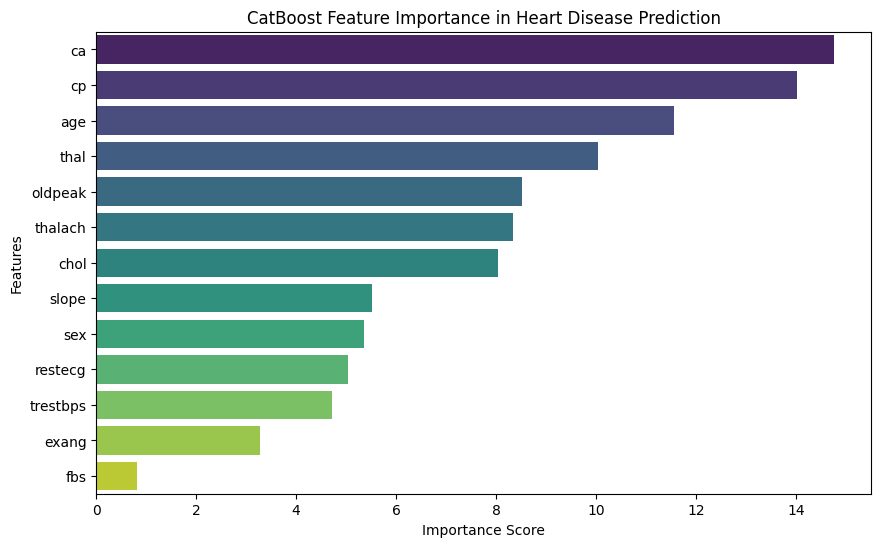

In [52]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay
)

cat_cols = ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
con_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Data split
X = df_split.drop("target", axis=1)
y = df_split["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# CatBoost Pools
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_cols)

# Model setup
cat_model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

# Training
cat_model.fit(train_pool, eval_set=test_pool, plot=False)

# Predictions
y_pred = cat_model.predict(X_test)
y_prob = cat_model.predict_proba(X_test)[:, 1]

# Metrics
train_acc = accuracy_score(y_train, cat_model.predict(X_train))
test_acc  = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

# Console Output
print("\n--- CatBoost Performance ---")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")
print(f"AUC Score        : {auc_score:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y_prob, name="CatBoost", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - CatBoost")
plt.show()

# Feature Importance
feat_imp = cat_model.get_feature_importance()
feat_names = X.columns

imp_df = (
    pd.DataFrame({"Feature": feat_names, "Importance": feat_imp})
      .sort_values("Importance", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=imp_df, x="Importance", y="Feature", palette="viridis")
plt.title("CatBoost Feature Importance in Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Support Vector Machine


--- SVM Performance ---
Accuracy : 0.8878
AUC Score: 0.9630

Confusion Matrix:
 [[85 15]
 [ 8 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.87      0.92      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



<Figure size 600x500 with 0 Axes>

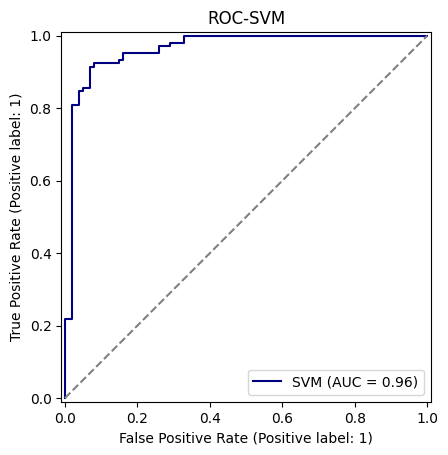

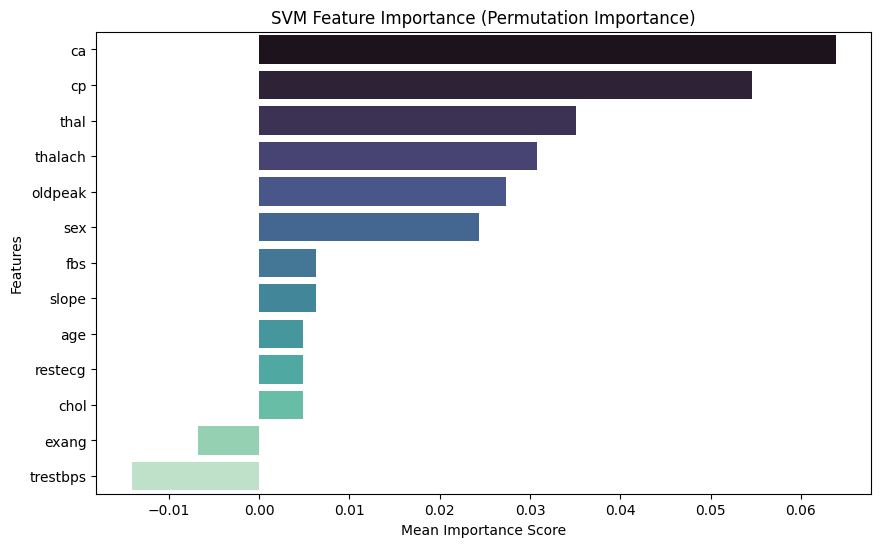

In [55]:


# Train SVM Model
svm_model = SVC(
    kernel="rbf",
    C=1,
    gamma="scale",
    probability=True,
    random_state=42
)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Performance Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm  = confusion_matrix(y_test, y_pred)

print("\n--- SVM Performance ---")
print(f"Accuracy : {acc:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y_prob, name="SVM", color="navy")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC-SVM")
plt.show()

# Feature Importance
perm_result = permutation_importance(
    svm_model, X_test, y_test, n_repeats=10, random_state=42
)
importances = perm_result.importances_mean

imp_df = (
    pd.DataFrame({"Feature": X.columns, "Importance": importances})
      .sort_values("Importance", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="Importance", y="Feature", palette="mako")
plt.title("SVM Feature Importance (Permutation Importance)")
plt.xlabel("Mean Importance Score")
plt.ylabel("Features")
plt.show()

# Decision Tree



--- Decision Tree Performance ---
Accuracy : 0.8732
AUC Score: 0.9326

Confusion Matrix:
 [[85 15]
 [11 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



<Figure size 600x500 with 0 Axes>

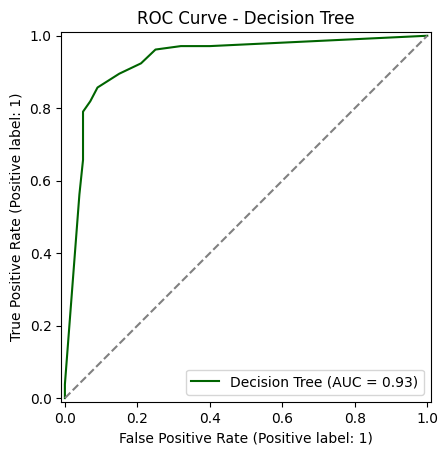

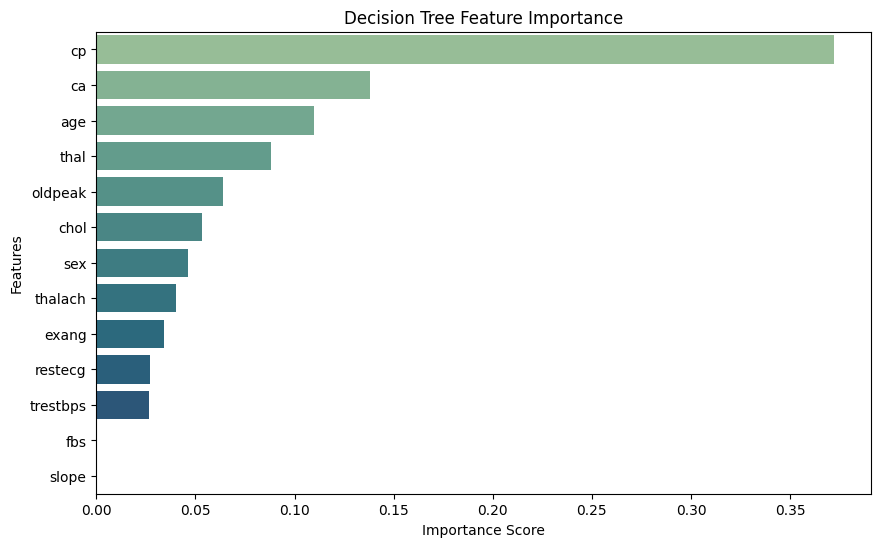

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm  = confusion_matrix(y_test, y_pred)

print("\n--- Decision Tree Performance ---")
print(f"Accuracy : {acc:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y_prob, name="Decision Tree", color="darkgreen")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC Curve - Decision Tree")
plt.show()

# Feature Importance
imp_df = (
    pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})
      .sort_values("Importance", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="Importance", y="Feature", palette="crest")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()





# Random Forest


--- Random Forest Performance ---
Accuracy : 0.9902
AUC Score: 0.9996

Confusion Matrix:
 [[ 98   2]
 [  0 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<Figure size 600x500 with 0 Axes>

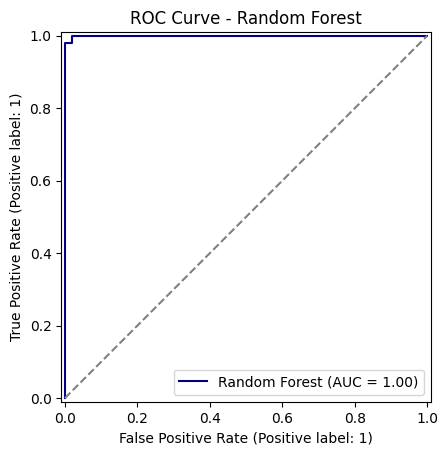

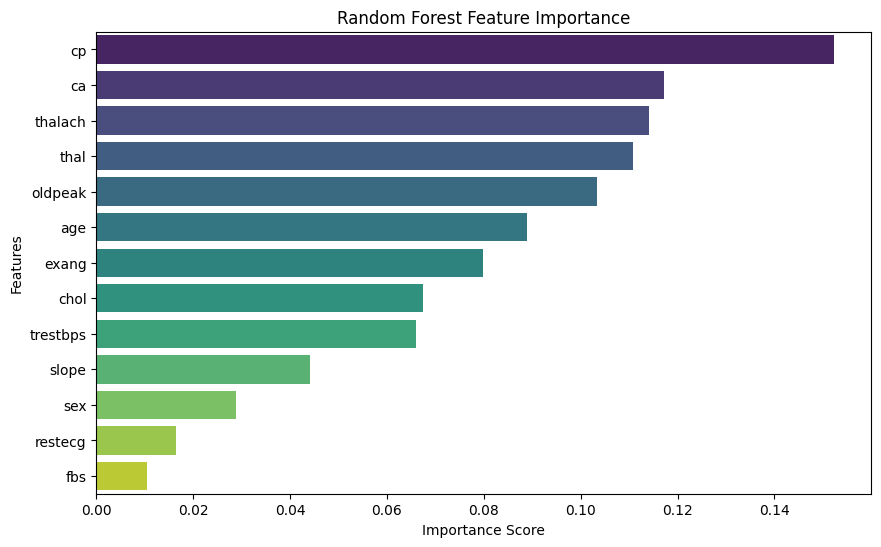

In [60]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm  = confusion_matrix(y_test, y_pred)

print("\n--- Random Forest Performance ---")
print(f"Accuracy : {acc:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y_prob, name="Random Forest", color="navy")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC Curve - Random Forest")
plt.show()

# Feature Importance (sorted)
imp_df = (
    pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
      .sort_values("Importance", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Confusion Matrix

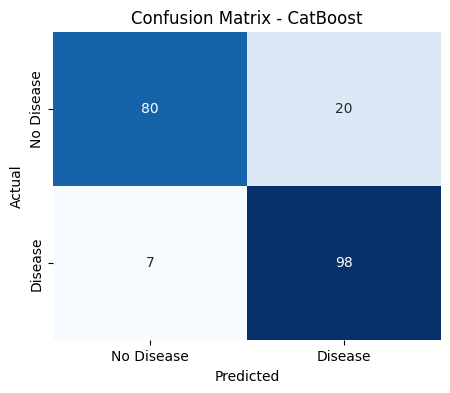

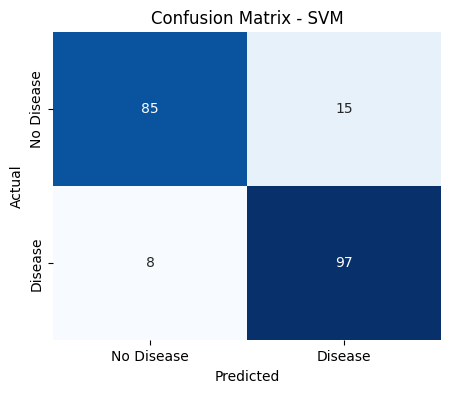

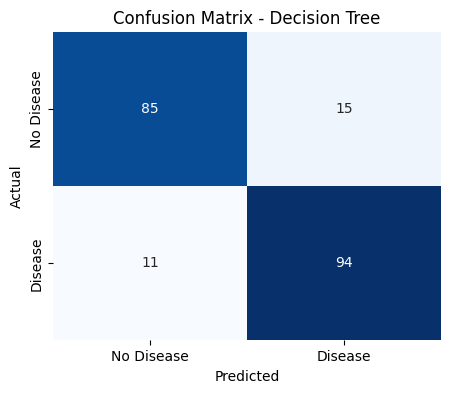

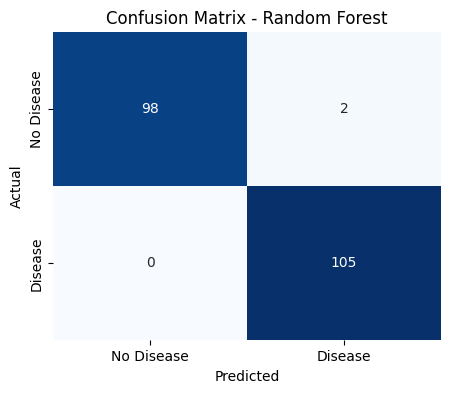

In [31]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



#  CatBoost Confusion Matrix

y_pred_cat = cat_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")


#  SVM Confusion Matrix

y_pred_svm = svm_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

#  Decision Tree Confusion Matrix

y_pred_dt = dt_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")


# Random Forest Confusion Matrix

y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

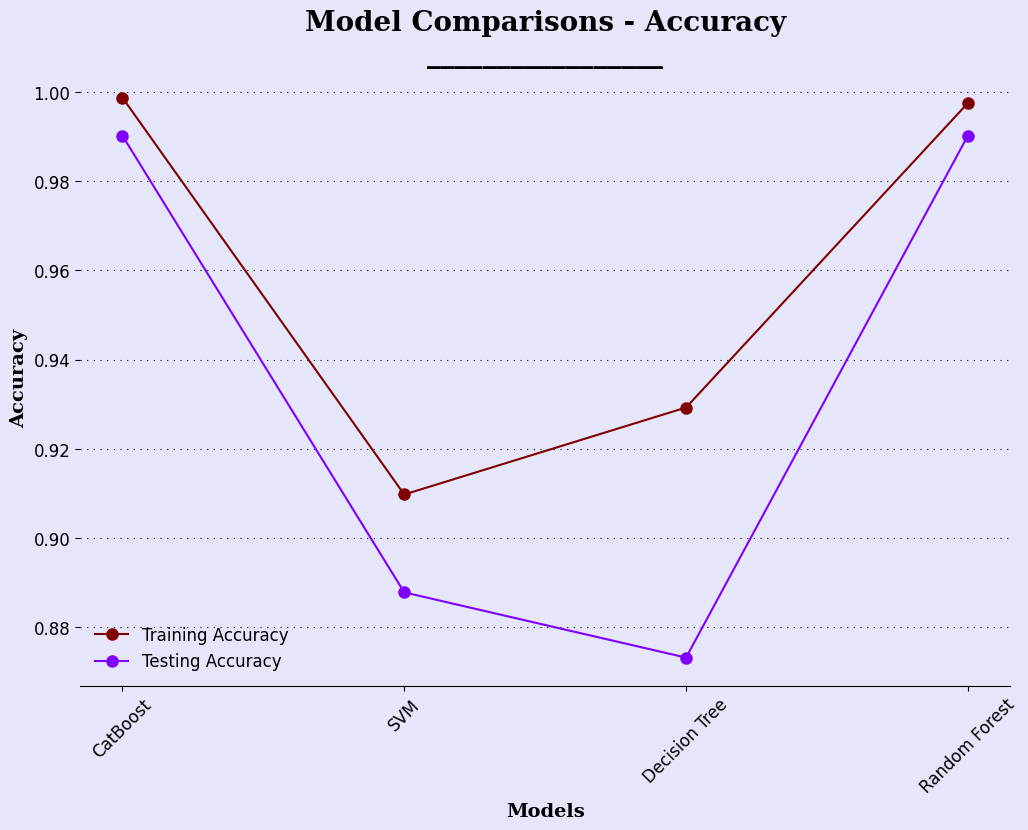

In [64]:
model_names   = ["CatBoost", "SVM", "Decision Tree", "Random Forest"]
train_results = [acc_train_cat, acc_train_svm, acc_train_dt, acc_train_rf]
test_results  = [acc_test_cat, acc_test_svm, acc_test_dt, acc_test_rf]

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
background_color = "#E6E6FA"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]

fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Title
ax.text(0.5, 1.05, "Model Comparisons - Accuracy\n_________________",
        horizontalalignment='center', verticalalignment='center',
        fontsize=20, fontweight='bold', fontfamily='serif', color="#000000",
        transform=ax.transAxes)

# Plot lines
ax.plot(model_names, train_results, 'o-', label="Training Accuracy", color=color_palette[0], markersize=8)
ax.plot(model_names, test_results, 'o-', label="Testing Accuracy", color=color_palette[1], markersize=8)

# Grid and spines
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Axis labels
ax.set_ylabel("Accuracy", fontsize=14, fontweight='bold', fontfamily='serif')
ax.set_xlabel("Models", fontsize=14, fontweight='bold', fontfamily='serif')
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Legend
ax.legend(frameon=False, fontsize=12)

plt.show()

In [33]:
print("CatBoost - Train:", acc_train_cat, " Test:", acc_test_cat)
print("SVM - Train:", acc_train_svm, " Test:", acc_test_svm)
print("Decision Tree - Train:", acc_train_dt, " Test:", acc_test_dt)
print("Random Forest - Train:", acc_train_rf, " Test:", acc_test_rf)


CatBoost - Train: 0.998780487804878  Test: 0.9902439024390244
SVM - Train: 0.9097560975609756  Test: 0.8878048780487805
Decision Tree - Train: 0.9292682926829269  Test: 0.8731707317073171
Random Forest - Train: 0.9975609756097561  Test: 0.9902439024390244


# HYPER PARAMETER TUNING : Decision Tree

In [34]:


param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt = DecisionTreeClassifier(random_state=42)


grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)

grid_dt.fit(X_train, y_train)

print("Decision Tree Best Parameters:", grid_dt.best_params_)
print("Decision Tree Best CV Score:", grid_dt.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree Best CV Score: 0.9890243902439024


Decision Tree Performance
Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



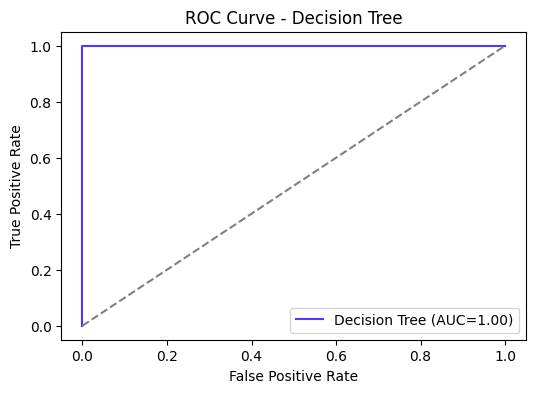

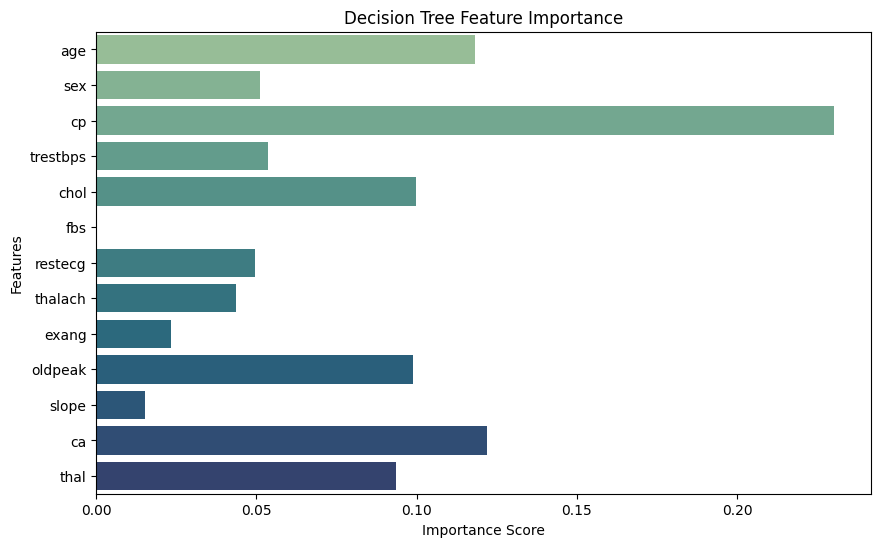

In [66]:
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='best',
    random_state=42
)

dt_model.fit(X_train, y_train)


# Evaluation

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Decision Tree Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={auc:.2f})", color="#5833ff")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive ")
plt.ylabel("True Positive ")
plt.title("ROC  - Decision Tree")
plt.legend()
plt.show()

# Feature Importance

importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="crest")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#Hyper Parameter tuning for SVM

In [35]:

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize model
svm = SVC(probability=True, random_state=42)


grid_svm = GridSearchCV(estimator=svm,
                        param_grid=param_grid_svm,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=1)

grid_svm.fit(X_train, y_train)

print("SVM Best Parameters:", grid_svm.best_params_)
print("SVM Best CV Score:", grid_svm.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
SVM Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
SVM Best CV Score: 0.9829268292682928


 SVM Performance
Accuracy: 1.0
AUC: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



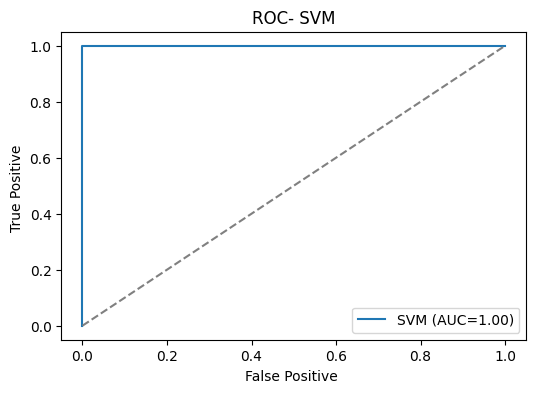

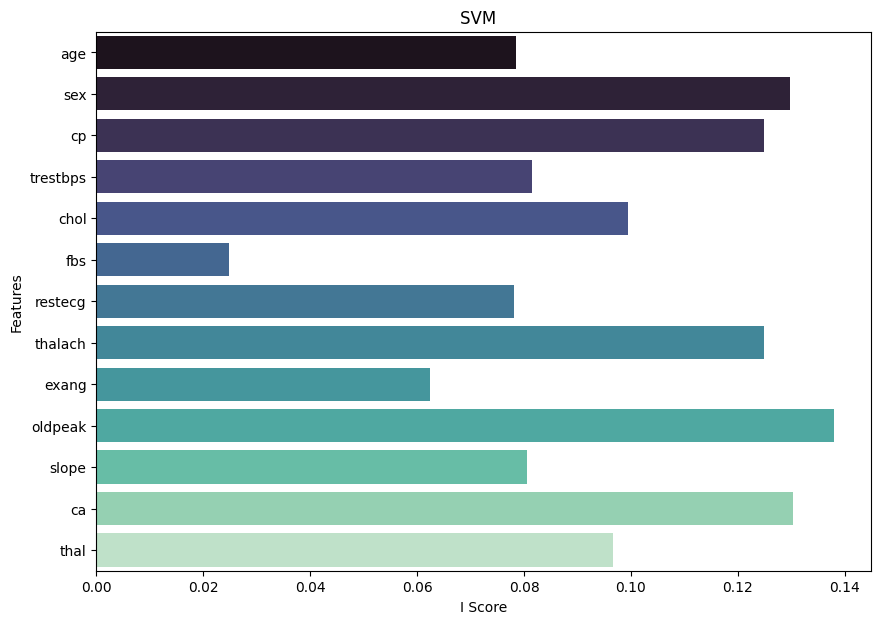

In [71]:
from sklearn.inspection import permutation_importance
# Train SVM Model

svm_model = SVC(
    kernel='poly',
    C=0.1,
    gamma=1.0,
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)


#  Evaluation

y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(" SVM Performance")
print("Accuracy:", acc)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"SVM (AUC={auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive ")
plt.ylabel("True Positive ")
plt.title("ROC- SVM")
plt.legend()
plt.show()




from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X.columns


plt.figure(figsize=(10,7))
sns.barplot(x=importances, y=feature_names, palette="mako")
plt.title("SVM  ")
plt.xlabel("I Score")
plt.ylabel("Features")
plt.show()